In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Read data

In [2]:
df = pd.read_csv('stats.csv')
EDITED = False

In [3]:
df.head()
df.describe()

,sizex,sizey,sizez,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing
count,84.000,84.00,84.000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.005,0.01,0.005,0.332151,83037.857143,10.659642,0.031636,0.022630,10.595773
std,0.000,0.00,0.000,0.298495,74623.735827,9.268174,0.017757,0.015135,9.236130
min,0.005,0.01,0.005,0.028800,7200.000000,2.646850,0.012674,0.008395,2.619030
25%,0.005,0.01,0.005,0.110592,27648.000000,3.356513,0.016149,0.010328,3.322078
50%,0.005,0.01,0.005,0.132936,33234.000000,4.427050,0.022231,0.014125,4.390080
75%,0.005,0.01,0.005,0.512000,128000.000000,18.343600,0.049154,0.035290,18.244625
max,0.005,0.01,0.005,1.000000,250000.000000,26.918700,0.060334,0.048218,26.803100


## Cleanup

In [4]:
if EDITED:
    print("Not reapplying cleanup.")
else:
    EDITED = True
    # fill to percent
    df['fill'] = (df['fill']*100).astype(int)


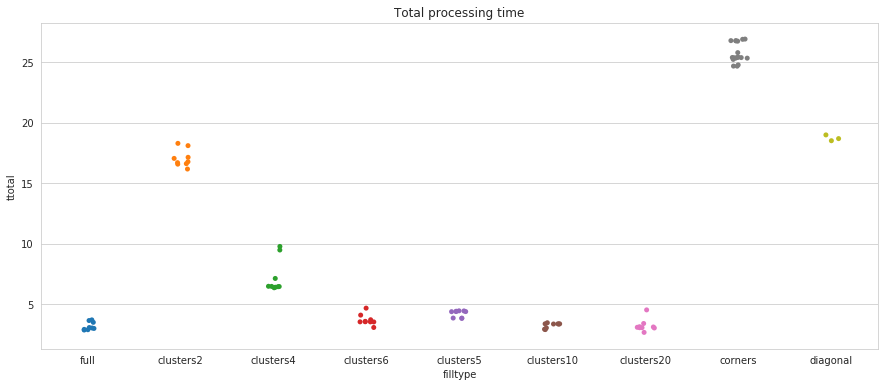

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="filltype", y="ttotal", data=df, ax=ax)
plt.title("Total processing time");

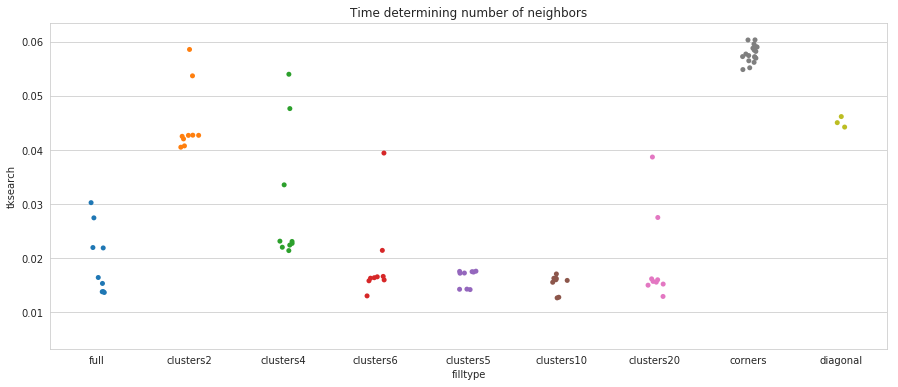

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
sns.stripplot(x="filltype", y="tksearch", data=df, ax=ax)
plt.title("Time determining number of neighbors");

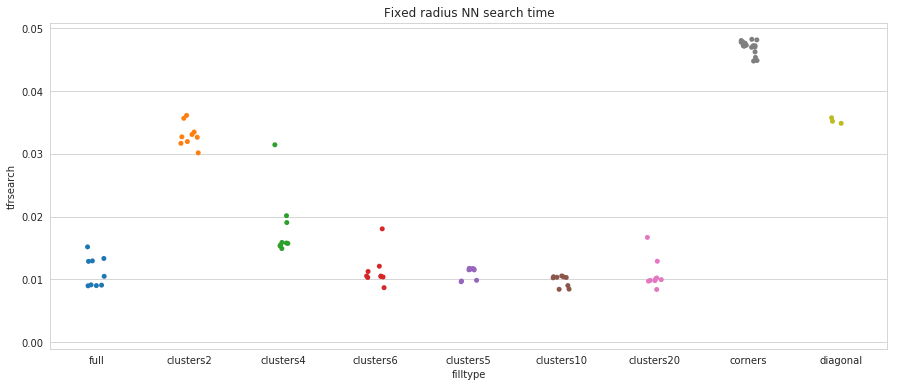

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="filltype", y="tfrsearch", data=df, ax=ax)
plt.title("Fixed radius NN search time");

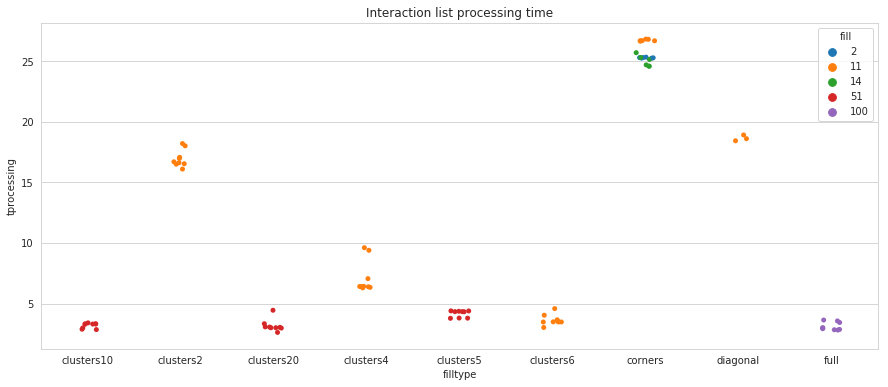

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="filltype", y="tprocessing", data=df, ax=ax, hue='fill')
plt.title("Interaction list processing time");

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


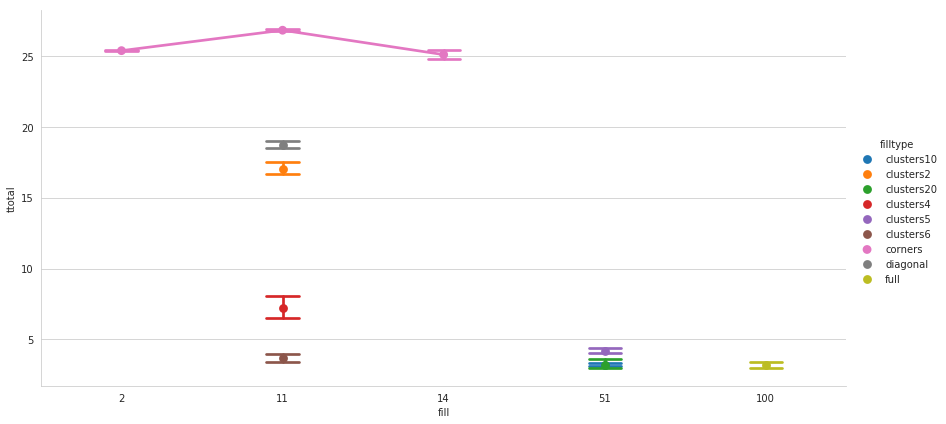

In [20]:
g = sns.catplot(x="fill", y="ttotal", hue="filltype", #col="filltype",
                capsize=.2, height=6, aspect=2.0,
                kind="point", data=df)

In [14]:
df.groupby('filltype').mean()

,sizex,sizey,sizez,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing
filltype,,,,,,,,,
clusters10,0.005,0.01,0.005,51,128000,3.221962,0.015432,0.009797,3.188837
clusters2,0.005,0.01,0.005,11,27648,17.041122,0.045135,0.033037,16.954356
clusters20,0.005,0.01,0.005,51,128000,3.211331,0.019214,0.010846,3.172808
clusters4,0.005,0.01,0.005,11,27648,7.204293,0.030005,0.018195,7.140146
clusters5,0.005,0.01,0.005,51,128000,4.202576,0.016379,0.010999,4.167184
clusters6,0.005,0.01,0.005,11,27648,3.679344,0.019074,0.011369,3.639444
corners,0.005,0.01,0.005,9,24134,25.764039,0.057785,0.046995,25.650000
diagonal,0.005,0.01,0.005,11,29424,18.726433,0.045146,0.035249,18.635667
full,0.005,0.01,0.005,100,250000,3.159143,0.019412,0.011226,3.119220


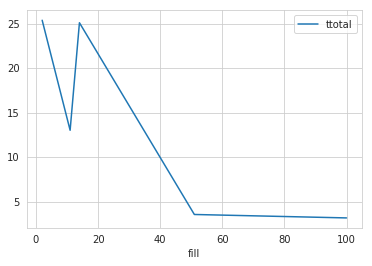

In [18]:
df.groupby('fill').mean().plot(y='ttotal', )

In [19]:
df.groupby('fill').mean()

,sizex,sizey,sizez,ndatapts,ttotal,tksearch,tfrsearch,tprocessing
fill,,,,,,,,
2,0.005,0.01,0.005,7200,25.377367,0.057279,0.047319,25.263767
11,0.005,0.01,0.005,27881,13.011512,0.037039,0.026551,12.936959
14,0.005,0.01,0.005,37044,25.096033,0.057736,0.045887,24.983233
51,0.005,0.01,0.005,128000,3.545290,0.017008,0.010547,3.509610
100,0.005,0.01,0.005,250000,3.159143,0.019412,0.011226,3.119220
